In [1]:
# simulation in the random features model

import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm
import gcmpyo3


from core.amp.likelihood import base_likelihood, bo_logit_likelihood, probit_likelihood
from core.amp.prior.nonseparable_gaussian_prior import NonSepGaussianPrior
from core.amp import gamp

from core.utility import sigmoid, KERNEL_COEFICIENTS, get_additional_noise_from_kappas, LOGISTIC_APPROX_COEF, generalisation_error_logit_teacher

import simulations

%load_ext autoreload
%autoreload 2

In [2]:
d         = 200
seeds     = 1

n_over_d  = 10.0
noise_std = 0.0
noise_var = noise_std**2

activation= 'erf'
_, kappa1, kappastar = KERNEL_COEFICIENTS[activation]

In [3]:
inv_alpha_range = [0.5949494949494949, 0.8424242424242424, 1.0898989898989901, 1.3373737373737375, 1.5848484848484852, 1.8323232323232326, 2.0797979797979806, 2.327272727272728, 2.5747474747474755, 2.8222222222222233, 3.06969696969697, 3.3171717171717177, 3.564646464646465, 3.812121212121213, 4.05959595959596, 4.307070707070707]
n_alpha = len(inv_alpha_range)

max_p        = int(n_over_d * d * inv_alpha_range[-1])
F_global     = np.random.normal(0.0, 1.0, size=(max_p, d)) / np.sqrt(d)

In [4]:
v_array, q_array, m_array = np.zeros((seeds, n_alpha)), np.zeros((seeds, n_alpha)), np.zeros((seeds, n_alpha))

for s in range(seeds):
    m_list, q_list, v_list = simulations.bo_trial(d, n_over_d, inv_alpha_range, kappa1, kappastar, noise_std, F_global)
    v_array[s] = v_list
    q_array[s] = q_list
    m_array[s] = m_list

 31%|███▏      | 5/16 [01:41<04:59, 27.22s/it]

In [ ]:
v_list = np.mean(v_array, axis=0)
q_list = np.mean(q_array, axis=0)
m_list = np.mean(m_array, axis=0)

In [ ]:
qs_for_bayes_optimal = []
vs_for_bayes_optimal = []
ms_for_bayes_optimal = []

for inv_alpha in tqdm(inv_alpha_range):
    alpha = 1. / inv_alpha
    gamma = n_over_d / alpha
    
    m, q, v, mhat, qhat, vhat = gcmpyo3.state_evolution.bayes_optimal_state_evolution_gcm(alpha, noise_var, gamma, kappa1, kappastar, 1.0, "logit", 1e-6, False, False)
    qs_for_bayes_optimal.append(q)
    vs_for_bayes_optimal.append(v)
    ms_for_bayes_optimal.append(m)

100%|██████████| 16/16 [00:01<00:00,  9.95it/s]


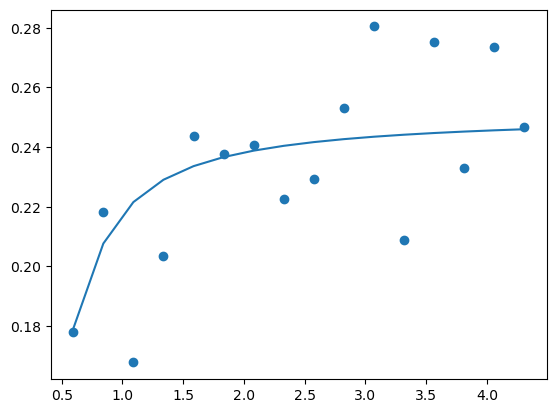

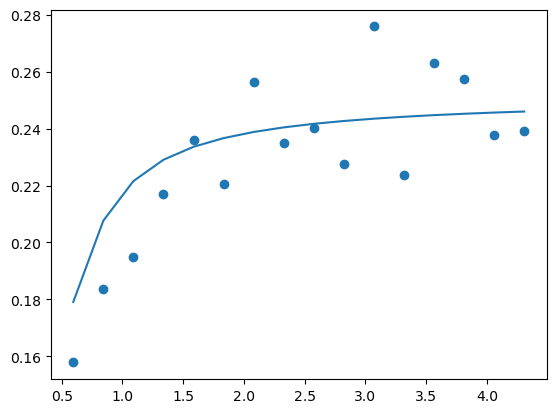

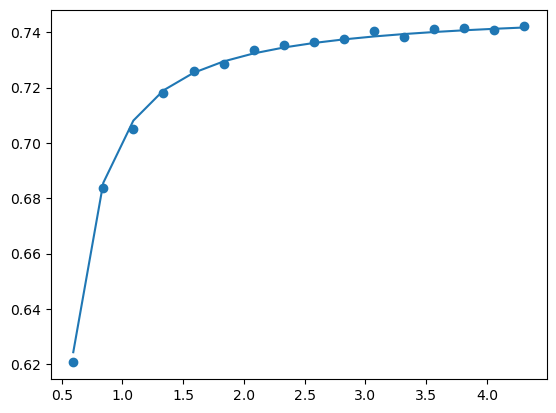

In [ ]:
# Comparison of the overlaps computed by state evolution and those computed experimentally

plt.scatter(inv_alpha_range, m_list)
plt.plot(inv_alpha_range, ms_for_bayes_optimal)
plt.show()

plt.scatter(inv_alpha_range, q_list)
plt.plot(inv_alpha_range, qs_for_bayes_optimal)
plt.show()

plt.scatter(inv_alpha_range, v_list)
plt.plot(inv_alpha_range, vs_for_bayes_optimal)
plt.show()

---

Copy the values of the overlap $m$, $q$, $v$ in the notebook to get the experimental values for the test error and calibration, etc.

In [ ]:
print('Experimental values of m : ')
print(list(m_list))
print('Experimental values of q : ')
print(list(q_list))
print('Experimental values of v : ')
print(list(v_list))

Experimental values of m : 
[0.17809485541452513, 0.21836968047183564, 0.167762394791722, 0.20349733812673196, 0.2435550272467166, 0.2376243701716384, 0.240714522825451, 0.2224968190717038, 0.22934111568690377, 0.2529945347163274, 0.2804374871980574, 0.20895854457997015, 0.275273620248204, 0.2330293531801393, 0.2735161544571826, 0.24684285444733028]
Experimental values of q : 
[0.1578544662705693, 0.18371346232435407, 0.19476962759421212, 0.21711951543820288, 0.23614545264498385, 0.22037249304508702, 0.256188111454279, 0.23490298765560533, 0.24028338251637685, 0.22744527824724037, 0.27584418399257504, 0.22356349828246214, 0.2630880796333523, 0.2575116988131787, 0.23769056339377306, 0.23915810738284604]
Experimental values of v : 
[0.6205762100824741, 0.6836581462357529, 0.7052266088553594, 0.7182145117657427, 0.7259311667336299, 0.728534113397595, 0.7336444729678923, 0.7355029964947665, 0.7364304021771718, 0.7375067876849911, 0.7404956152019324, 0.7383238475963458, 0.7412755222155405, 